## PART 1

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ASL_DATASET.zip"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
)



In [ ]:
train_generator = train_datagen.flow_from_directory(
    'asl_alphabet_train',
    target_size = (200,200),   
    batch_size = 32        
)
test_generator = test_datagen.flow_from_directory(
    'asl_alphabet_test',
    target_size = (200,200),
    batch_size = 32,
    shuffle = False
)

Found 84100 images belonging to 29 classes.
Found 2900 images belonging to 29 classes.


In [ ]:
X, y  = train_generator.next()
X.shape
y.shape

(32, 29)

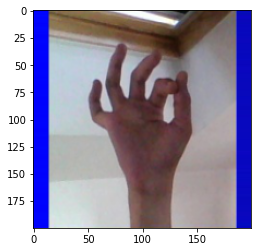

In [ ]:
plt.imshow(X[5])
# y

In [ ]:
train_generator.reset()

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(7,7),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,(7,7),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      9472      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      200768    
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# epochs = 5  
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in train_generator:
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= 84100 / 32:  # where 84100 is the len(X_train)
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break


In [ ]:
# history = model.fit(train_generator, epochs=5)

In [ ]:
model.save('/content/drive/MyDrive/model_trained.h5')

In [ ]:
# import pickle
# pickle.dump(model,open('/content/drive/MyDrive/model_trained.sav','wb'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(train_generator, epochs=10,verbose=1, batch_size=64, validation_data=(test_generator), callbacks=[es])

Epoch 1/10
2629/2629 [==============================] - 707s 269ms/step - loss: 2.1556 - accuracy: 0.3673 - val_loss: 1.6675 - val_accuracy: 0.4503
Epoch 2/10
2629/2629 [==============================] - 693s 263ms/step - loss: 1.0435 - accuracy: 0.6629 - val_loss: 0.6689 - val_accuracy: 0.7579
Epoch 3/10
2629/2629 [==============================] - 694s 264ms/step - loss: 0.5860 - accuracy: 0.8054 - val_loss: 1.2179 - val_accuracy: 0.6772
Epoch 4/10
2629/2629 [==============================] - 693s 264ms/step - loss: 0.4092 - accuracy: 0.8634 - val_loss: 0.4048 - val_accuracy: 0.8745
Epoch 5/10
2629/2629 [==============================] - 692s 263ms/step - loss: 0.3207 - accuracy: 0.8916 - val_loss: 0.3329 - val_accuracy: 0.8855
Epoch 6/10
2629/2629 [==============================] - 690s 262ms/step - loss: 0.2625 - accuracy: 0.9113 - val_loss: 0.2218 - val_accuracy: 0.9245
Epoch 7/10
2629/2629 [==============================] - 690s 262ms/step - loss: 0.2246 - accuracy: 0.9252 - val_

In [ ]:
model.save('/content/drive/MyDrive/model_trained_v2.h5')

In [ ]:
from tensorflow import keras
aa = keras.models.load_model('/content/drive/MyDrive/model_trained_v2.h5')
# history.history

In [ ]:
# history = model.fit(train_generator, epochs=10,verbose=1, batch_size=32, validation_data=(test_generator), callbacks=[es])


In [ ]:
score = model.evaluate(test_generator)

91/91 [==============================] - 5s 55ms/step - loss: 0.0599 - accuracy: 0.9821


This accuracy coming higher than training as I accidentally used this test set as the validation set....

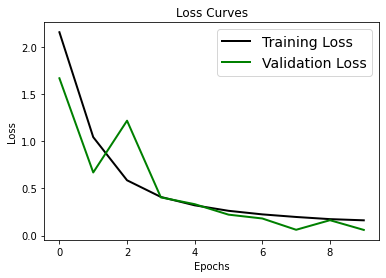

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
model.history.on_batch_begin(1)
# history.history

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

           A       1.00      0.92      0.96       100
           B       1.00      0.98      0.99       100
           C       1.00      1.00      1.00       100
           D       0.98      1.00      0.99       100
           E       1.00      0.94      0.97       100
           F       1.00      0.99      0.99       100
           G       0.96      0.99      0.98       100
           H       0.99      0.98      0.98       100
           I       1.00      0.98      0.99       100
           J       1.00      0.98      0.99       100
           K       0.98      1.00      0.99       100
           L       1.00      0.98      0.99       100
           M       0.94      1.00      0.97       100
           N       0.99      1.00      1.00       100
           O       1.00      1.00      1.00       100
           P       0.99      1.00      1.00       100
           Q       1.00      0.99      0.99       100
           R       0.93    

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sn
mcm = multilabel_confusion_matrix(true_classes, predicted_classes)
print(mcm)

[[[2800    0]
  [   8   92]]

 [[2800    0]
  [   2   98]]

 [[2800    0]
  [   0  100]]

 [[2798    2]
  [   0  100]]

 [[2800    0]
  [   6   94]]

 [[2800    0]
  [   1   99]]

 [[2796    4]
  [   1   99]]

 [[2799    1]
  [   2   98]]

 [[2800    0]
  [   2   98]]

 [[2800    0]
  [   2   98]]

 [[2798    2]
  [   0  100]]

 [[2800    0]
  [   2   98]]

 [[2794    6]
  [   0  100]]

 [[2799    1]
  [   0  100]]

 [[2800    0]
  [   0  100]]

 [[2799    1]
  [   0  100]]

 [[2800    0]
  [   1   99]]

 [[2793    7]
  [   4   96]]

 [[2800    0]
  [   0  100]]

 [[2792    8]
  [   3   97]]

 [[2791    9]
  [   2   98]]

 [[2798    2]
  [   7   93]]

 [[2799    1]
  [   3   97]]

 [[2798    2]
  [   1   99]]

 [[2800    0]
  [   2   98]]

 [[2797    3]
  [   0  100]]

 [[2797    3]
  [   0  100]]

 [[2800    0]
  [   0  100]]

 [[2800    0]
  [   3   97]]]


## PART 2

In [ ]:
import tensorflow_hub as hub

In [ ]:
m = tf.keras.Sequential(
    [hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",trainable = False),
     tf.keras.layers.Dense(len(class_labels), activation='softmax')])
m.build([None, 200, 200, 3])


In [ ]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              10178374  
                                                                 
 dense_2 (Dense)             (None, 29)                29029     
                                                                 
Total params: 10,207,403
Trainable params: 29,029
Non-trainable params: 10,178,374
_________________________________________________________________


In [ ]:
m.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:
checkpoint_filepath = 'efficientnet_v2.h5'
mcp = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = m.fit(train_generator, epochs=10, verbose=1, validation_data = test_generator,callbacks=[es,mcp])

Epoch 1/10
2629/2629 [==============================] - 700s 263ms/step - loss: 0.4087 - accuracy: 0.8887 - val_loss: 0.2422 - val_accuracy: 0.9252
Epoch 2/10
2629/2629 [==============================] - 691s 263ms/step - loss: 0.1435 - accuracy: 0.9572 - val_loss: 0.1382 - val_accuracy: 0.9569
Epoch 3/10
2629/2629 [==============================] - 696s 265ms/step - loss: 0.1077 - accuracy: 0.9665 - val_loss: 0.1004 - val_accuracy: 0.9683
Epoch 4/10
2629/2629 [==============================] - 686s 261ms/step - loss: 0.0873 - accuracy: 0.9713 - val_loss: 0.1084 - val_accuracy: 0.9600
Epoch 5/10
2629/2629 [==============================] - 687s 261ms/step - loss: 0.0770 - accuracy: 0.9752 - val_loss: 0.1260 - val_accuracy: 0.9555
Epoch 6/10
2629/2629 [==============================] - 685s 261ms/step - loss: 0.0689 - accuracy: 0.9771 - val_loss: 0.0805 - val_accuracy: 0.9755
Epoch 7/10
2629/2629 [==============================] - 685s 261ms/step - loss: 0.0646 - accuracy: 0.9792 - val_

In [ ]:
m.save('/content/drive/MyDrive/efficientnet_v2.h5')

Text(0.5, 1.0, 'Loss Curves')

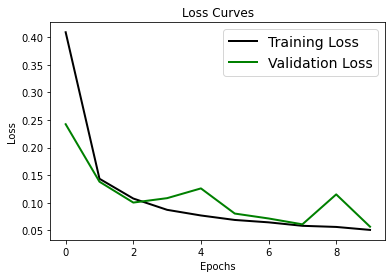

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Loss Curves')

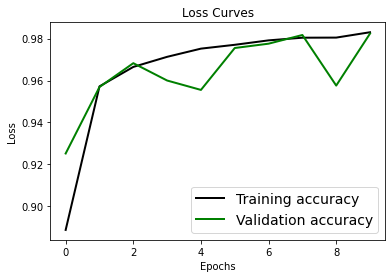

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
from tensorflow import keras
m = keras.models.load_model('/content/drive/MyDrive/efficientnet_v2.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = m.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           A       1.00      0.89      0.94       100
           B       1.00      1.00      1.00       100
           C       0.98      1.00      0.99       100
           D       1.00      0.98      0.99       100
           E       0.90      0.99      0.94       100
           F       1.00      0.99      0.99       100
           G       1.00      0.99      0.99       100
           H       1.00      1.00      1.00       100
           I       0.99      0.99      0.99       100
           J       1.00      1.00      1.00       100
           K       1.00      0.99      0.99       100
           L       1.00      1.00      1.00       100
           M       0.92      0.98      0.95       100
           N       0.98      0.94      0.96       100
           O       0.97      0.99      0.98       100
           P       1.00      1.00      1.00       100
           Q       1.00      1.00      1.00       100
           R       0.99    

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sn
mcm = multilabel_confusion_matrix(true_classes, predicted_classes)
print(mcm)

[[[2800    0]
  [  11   89]]

 [[2800    0]
  [   0  100]]

 [[2798    2]
  [   0  100]]

 [[2800    0]
  [   2   98]]

 [[2789   11]
  [   1   99]]

 [[2800    0]
  [   1   99]]

 [[2800    0]
  [   1   99]]

 [[2800    0]
  [   0  100]]

 [[2799    1]
  [   1   99]]

 [[2800    0]
  [   0  100]]

 [[2800    0]
  [   1   99]]

 [[2800    0]
  [   0  100]]

 [[2792    8]
  [   2   98]]

 [[2798    2]
  [   6   94]]

 [[2797    3]
  [   1   99]]

 [[2800    0]
  [   0  100]]

 [[2800    0]
  [   0  100]]

 [[2799    1]
  [   5   95]]

 [[2794    6]
  [   3   97]]

 [[2794    6]
  [   0  100]]

 [[2797    3]
  [   3   97]]

 [[2798    2]
  [   1   99]]

 [[2800    0]
  [   2   98]]

 [[2797    3]
  [   5   95]]

 [[2797    3]
  [   3   97]]

 [[2800    0]
  [   2   98]]

 [[2800    0]
  [   0  100]]

 [[2800    0]
  [   0  100]]

 [[2800    0]
  [   0  100]]]


In [ ]:
m = tf.keras.Sequential(
    [hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",trainable = True),
     tf.keras.layers.Dense(len(class_labels), activation='softmax')])
m.build([None, 200, 200, 3])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
m.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = m.fit(train_generator, epochs=10, verbose=1, validation_data = test_generator,callbacks=[es,mcp])


##My FINDINGS

1) Pretrained models are much more accurate than custom models.

2) Accuracy:
  
  Custom = 94.54 % for 10 epochs

  Pretrained (Trainable = False) = 98.30 % for 10 epochs

  Pretrained (Trainable = True) = Not able to perform this due to limit reachability of colab.

3) When used trainable = True the time consumption was more as the ETA for 1 epoch was around 13min while in trainable = False it was around 11min per epoch.

4) High precision and recall indicates that our model will likely to produce correct predictions and is ready to use.